In [ ]:
from IPython.core.display import JSON
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
try:
  import ktrain
except:
  !pip install ktrain
  os.kill(os.getpid(), 9)
from ktrain import text
from ktrain.text import texts_from_df
import time

import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu May 12 14:18:15 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8    25W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
reviews = pd.read_json("/content/drive/MyDrive/Colab_Notebooks/dtsa5798/data.json")

In [ ]:
reviews.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [ ]:
reviews['combined_text'] = reviews['headline'] + ' ' + reviews['short_description']

In [ ]:
reviews[reviews['category'].str.contains("HEALTHY LIVING")]

,category,headline,authors,link,short_description,date,combined_text
7578,HEALTHY LIVING,To The People Who Say ‘I’m Tired’ When Someone...,"The Mighty, ContributorWe face disability, dis...",https://www.huffingtonpost.com/entry/to-the-pe...,"When you feel like this, it’s important to kno...",2018-01-16,To The People Who Say ‘I’m Tired’ When Someone...
7693,HEALTHY LIVING,Eating Shake Shack Made Me Feel Healthier Than...,"Colleen Werner, ContributorCampus Editor-at-Large",https://www.huffingtonpost.com/entry/eating-sh...,I can vividly remember the first time I felt f...,2018-01-12,Eating Shake Shack Made Me Feel Healthier Than...
7747,HEALTHY LIVING,How To Stay Updated On The News Without Losing...,Lindsay Holmes,https://www.huffingtonpost.com/entry/anxiety-f...,Because it's only becoming more of a struggle.,2018-01-12,How To Stay Updated On The News Without Losing...
7927,HEALTHY LIVING,27 Perfect Tweets About Whole30 That Will Make...,Lindsay Holmes,https://www.huffingtonpost.com/entry/tweets-ab...,"""The only Whole30 I want to participate in is ...",2018-01-10,27 Perfect Tweets About Whole30 That Will Make...
7934,HEALTHY LIVING,The Real Reason Your Hands Are Always Cold,"Refinery29, ContributorThe #1 new-media brand ...",https://www.huffingtonpost.com/entry/the-real-...,"Essentially, your hands are kept warm thanks t...",2018-01-10,The Real Reason Your Hands Are Always Cold Ess...
...,...,...,...,...,...,...,...
124913,HEALTHY LIVING,Why You Need Both a 'Bouncer' and a 'Bartender...,"Elizabeth Grace Saunders, ContributorFounder, ...",https://www.huffingtonpost.com/entry/happy-hea...,Instead of judging whether you made the right ...,2014-04-18,Why You Need Both a 'Bouncer' and a 'Bartender...
124914,HEALTHY LIVING,How Video Games Can Improve Dialogue on Mental...,"Mona Shattell, Contributornurse researcher",https://www.huffingtonpost.com/entry/mental-il...,While there are strong arguments for the games...,2014-04-18,How Video Games Can Improve Dialogue on Mental...
124925,HEALTHY LIVING,Wake-Up Calls Inspired My Change From Overdriv...,"Jane Shure, ContributorLeadership Coach, Psych...",https://www.huffingtonpost.com/entry/wake-up-c...,My wake-up call marching orders were clear: No...,2014-04-18,Wake-Up Calls Inspired My Change From Overdriv...
124950,HEALTHY LIVING,Loving a Narcissist Without Losing Yourself,"Nancy Colier, ContributorPsychotherapist, inte...",https://www.huffingtonpost.com/entry/narcissis...,It is very difficult for some people to see an...,2014-04-18,Loving a Narcissist Without Losing Yourself It...


In [ ]:
reviews['healthy'] = np.where((reviews['category'] == 'HEALTHY LIVING'), 1, 0)

In [ ]:
sample_amount =  len(reviews[reviews["healthy"] == 1])

healthy = reviews[reviews['healthy'] == 1]
not_healthy = reviews[reviews['healthy'] == 0].sample(n=sample_amount)

In [ ]:
review_sample = pd.concat([healthy,not_healthy])

In [ ]:
review_sample.describe()

,healthy
count,13388.000000
mean,0.500000
std,0.500019
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [ ]:
target_names = ['NOT HEALTHY LIVING','HEALTHY LIVING']

In [ ]:
tf.keras.backend.clear_session() #to prevent training on top of training
t = text.Transformer('distilbert-base-uncased', maxlen=512, class_names=target_names)
#'roberta-base', 'distilbert-base-uncased', 'distilroberta-base', 'distilroberta-base'

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
train, val, preprocess = ktrain.text.texts_from_df(
    review_sample,
    "combined_text",
    label_columns=["healthy"],
    val_df=None,
    max_features=10000,
    maxlen=512,
    val_pct=0.1,
    ngram_range=0, #do you want tensforflow to only consider unigrams or combos of words?
    preprocess_mode="distilbert", #try roberta-base, bert-base-uncased, distilroberta-base, distilbert
    verbose=0
)

['not_healthy', 'healthy']
        not_healthy  healthy
117607          1.0      0.0
98966           0.0      1.0
112887          0.0      1.0
43076           1.0      0.0
113955          1.0      0.0
['not_healthy', 'healthy']
       not_healthy  healthy
58106          1.0      0.0
37618          1.0      0.0
50082          0.0      1.0
84081          1.0      0.0
21366          1.0      0.0


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

In [ ]:
model = preprocess.get_classifier()
learner = ktrain.get_learner(model, train_data=train, val_data=val, batch_size=16)
# batch size is 16 or under for text, can decrease or increase to get good performance

Downloading:   0%|          | 0.00/363M [00:00<?, ?B/s]

In [ ]:
learner.lr_find(max_epochs=6)

simulating training for different learning rates... this may take a few moments...
Epoch 1/6
753/753 [==============================] - 1296s 2s/step - loss: 0.6506 - accuracy: 0.6447
Epoch 2/6
753/753 [==============================] - 1278s 2s/step - loss: 0.3723 - accuracy: 0.8453
Epoch 3/6
753/753 [==============================] - 1278s 2s/step - loss: 0.4401 - accuracy: 0.7960
Epoch 4/6
753/753 [==============================] - 1268s 2s/step - loss: 0.6950 - accuracy: 0.5004
Epoch 5/6
753/753 [==============================] - 93s 121ms/step - loss: 4.0090 - accuracy: 0.4617


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


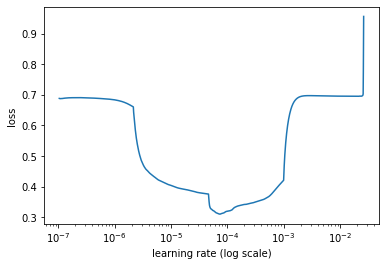

In [ ]:
learner.lr_plot()

In [ ]:
history=learner.autofit(
    1e-4,
    checkpoint_folder='checkpoint',
    epochs=5,
    early_stopping=True
)



begin training using triangular learning rate policy with max lr of 0.0001...
Epoch 1/5
754/754 [==============================] - 1303s 2s/step - loss: 0.3304 - accuracy: 0.8654 - val_loss: 0.2957 - val_accuracy: 0.8805
Epoch 2/5
754/754 [==============================] - 1298s 2s/step - loss: 0.2132 - accuracy: 0.9210 - val_loss: 0.3191 - val_accuracy: 0.8805
Epoch 2: early stopping
Weights from best epoch have been loaded into model.


In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=preprocess)

In [ ]:
predictor.save("drive/MyDrive/MSDSTextClassification_Lab2.healthy_living")

In [ ]:
validation = learner.validate(val_data=val, print_report=True)

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       667
           1       0.86      0.91      0.88       672

    accuracy                           0.88      1339
   macro avg       0.88      0.88      0.88      1339
weighted avg       0.88      0.88      0.88      1339

